# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane had lower overall Tumor Volumes in comparison to Infubinol and Ceftamin, indicating a higher overall efficacy among the former treatments.
- There is a relatively strong positive correlation between Mouse Weight and Tumor Volume.
- Infubinol was the only medication trialed to display any outliers.

 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice.
unique_mice = mouse_data_complete["Mouse ID"].unique()
mouse_count = len(unique_mice)
print(mouse_count)

249


In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_data_complete.groupby(["Mouse ID", "Timepoint"]).count()
mouse_duplicates.sort_values(["Drug Regimen"], ascending=False)


Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   
...                          ...  ...         ...         ...   
i334     20                    1    1           1           1   
         15                    1    1           1           1   
         10                    1    1           1           1   
         5                     1    1           1           1   
z969     45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2  
...                                ...               ...  
i334     20                          1                 1  
         15                          1                 1  
         10                          1                 1  
         5                           1                 1  
z969     45                          1                 1  

[1888 rows x 6 columns]

In [54]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete2 = mouse_data_complete.set_index("Mouse ID")
mouse_data_complete2.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_complete2.drop(index=('g989'))
mouse_data_clean

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [56]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean = mouse_data_clean.reset_index()
unique_mice2 = mouse_data_clean["Mouse ID"].unique()
mouse_count2 = len(unique_mice2)
print(mouse_count2)

248


## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = mouse_data_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = mouse_data_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = mouse_data_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_stddev = mouse_data_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = mouse_data_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

drug_summary = pd.DataFrame({
    "Average Tumor Volume":tumor_mean, 
    "Median Tumor Volume":tumor_median, 
    "Variance":tumor_variance, 
    "Standard Deviation":tumor_stddev, 
    "Standard Error":tumor_sem,
    })

drug_summary


,Average Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line.
drug_summary.aggregate(func=list)


,Average Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

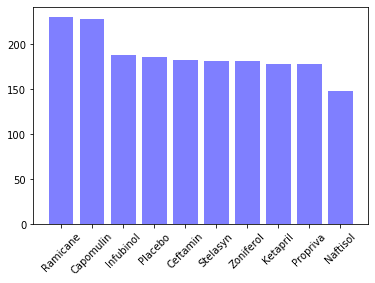

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create a bar chart that shows the number of tests/mice on the Y axis and the Drug Regimen on the X axis
drug_regimen_count = mouse_data_clean['Drug Regimen'].value_counts()
x_axis = mouse_data_clean['Drug Regimen'].unique()
y_axis = drug_regimen_count
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation = 45)
plt.show()


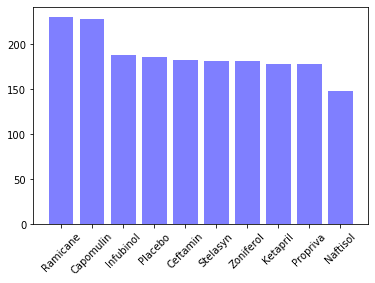

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation = 45)
plt.show()

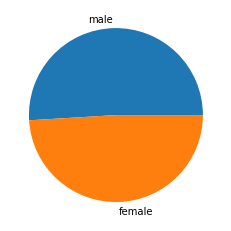

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_data_clean['Sex'].value_counts()
plt.pie(gender_count, labels=['male', 'female'])
plt.show()


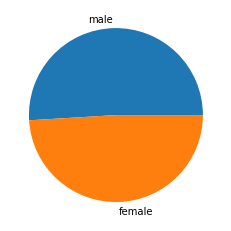

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = mouse_data_clean['Sex'].value_counts()
plt.pie(gender_count, labels=['male', 'female'])
plt.show()


## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(mouse_data_clean.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_data_last_timepoint = pd.merge(last_timepoint, mouse_data_clean, how="left", on=["Mouse ID", "Timepoint"])
mouse_data_last_timepoint.reset_index()
mouse_data_last_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [64]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
for t in treatment_list:
    intermediate_df = mouse_data_last_timepoint.loc[mouse_data_last_timepoint['Drug Regimen'] == t, 'Tumor Volume (mm3)']
    tumor_vol_list.append(intermediate_df) 
    q1=intermediate_df.quantile(0.25)
    q3=intermediate_df.quantile(0.75)
    IQR=q3-q1
    # Determine outliers using upper and lower bounds
    outliers = intermediate_df[((intermediate_df<(q1-1.5*IQR)) | (intermediate_df>(q3+1.5*IQR)))]
    print(t,outliers)
    
   
    

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


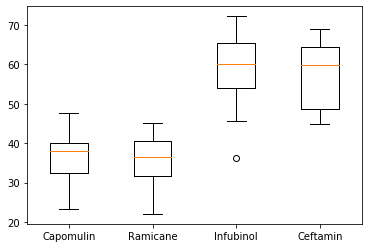

In [65]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_list, labels=treatment_list)
plt.show()

## Line and Scatter Plots

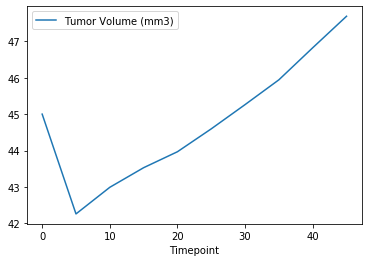

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
i557_df = mouse_data_clean.loc[(mouse_data_clean['Mouse ID'] == 'i557'), ['Tumor Volume (mm3)', 'Timepoint']]
i557_df.plot('Timepoint', 'Tumor Volume (mm3)')


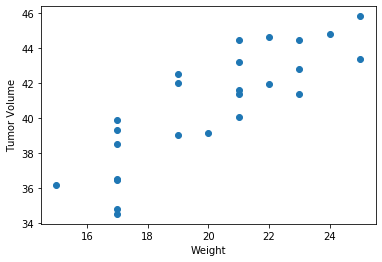

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = mouse_data_clean.loc[(mouse_data_clean['Drug Regimen'] == 'Capomulin'), ['Tumor Volume (mm3)', 'Weight (g)', 'Mouse ID']]
average_tumor = weight_df.groupby(['Weight (g)', 'Mouse ID']).mean()[['Tumor Volume (mm3)']]
average_tumor.reset_index(inplace=True)
plt.scatter(average_tumor['Weight (g)'],average_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
print(st.pearsonr(average_tumor['Weight (g)'],average_tumor['Tumor Volume (mm3)']))

(0.8419363424694718, 1.3225722434712687e-07)


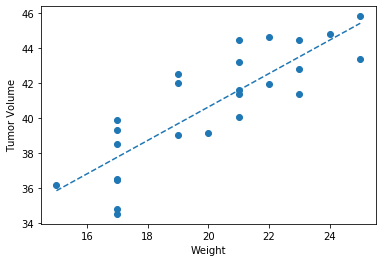

In [71]:
# linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

w_slope, w_int, w_r, w_p, w_std_err = st.linregress(average_tumor['Weight (g)'], average_tumor['Tumor Volume (mm3)'])
at_line = w_slope * average_tumor['Weight (g)'] + w_int

plt.scatter(average_tumor['Weight (g)'],average_tumor['Tumor Volume (mm3)'])
plt.plot(average_tumor['Weight (g)'],at_line, '--')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()
